<a href="https://colab.research.google.com/github/AhsanAAR/GTSRB_CNN/blob/main/CNN_GTSRB_GROUP13.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets download meowmeowmeowmeowmeow/gtsrb-german-traffic-sign
! unzip gtsrb-german-traffic-sign.zip -d dataset

Streaming output truncated to the last 5000 lines.
  inflating: dataset/train/5/00005_00053_00010.png  
  inflating: dataset/train/5/00005_00053_00011.png  
  inflating: dataset/train/5/00005_00053_00012.png  
  inflating: dataset/train/5/00005_00053_00013.png  
  inflating: dataset/train/5/00005_00053_00014.png  
  inflating: dataset/train/5/00005_00053_00015.png  
  inflating: dataset/train/5/00005_00053_00016.png  
  inflating: dataset/train/5/00005_00053_00017.png  
  inflating: dataset/train/5/00005_00053_00018.png  
  inflating: dataset/train/5/00005_00053_00019.png  
  inflating: dataset/train/5/00005_00053_00020.png  
  inflating: dataset/train/5/00005_00053_00021.png  
  inflating: dataset/train/5/00005_00053_00022.png  
  inflating: dataset/train/5/00005_00053_00023.png  
  inflating: dataset/train/5/00005_00053_00024.png  
  inflating: dataset/train/5/00005_00053_00025.png  
  inflating: dataset/train/5/00005_00053_00026.png  
  inflating: dataset/train/5/00005_00053_00027.p

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, MaxPooling2D, Dense, Dropout, Activation, Flatten
from sklearn.model_selection import train_test_split
import tensorflow as tf
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os

sess = tf.compat.v1.Session(config=tf.compat.v1.ConfigProto(log_device_placement=True)) # allow gpu usage

Device mapping:
/job:localhost/replica:0/task:0/device:GPU:0 -> device: 0, name: Tesla K80, pci bus id: 0000:00:04.0, compute capability: 3.7



In [ ]:
train_X = []
train_y = []
labels = []
counts = []
min_label_count = 0

for i in range(0,43):
    n = str(i)
    train_path = "dataset/Train/" + n
    label = [0 for i in range(0, 43)]
    label[i] = 1
    file_names = os.listdir(train_path)

    if len(file_names) < min_label_count:
        continue

    for file_name in file_names:
        img = cv.imread(train_path + "/" + file_name)
        img = cv.resize(img, (40,40))
        train_X.append(img)
        train_y.append(label)

    labels.append(i)
    counts.append(len(file_names))

train_X = np.asarray(train_X, dtype = "float32")
train_y = np.asarray(train_y, dtype= "float32")

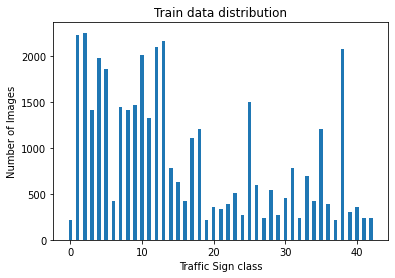

Number of classes = 43
Label range  = 0 to 42
Max count = 2250
Min count = 210


In [ ]:
plt.bar(labels,counts,width=0.5)
plt.title('Train data distribution')
plt.ylabel('Number of Images')
plt.xlabel('Traffic Sign class')
plt.show()

print(f"Number of classes = {len(labels)}")
print(f"Label range  = {min(labels)} to {max(labels)}")
print(f"Max count = {max(counts)}")
print(f"Min count = {min(counts)}")

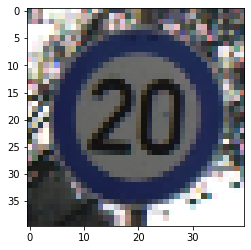

[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


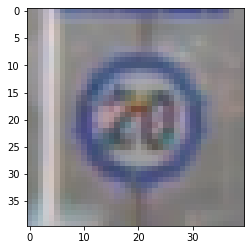

[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


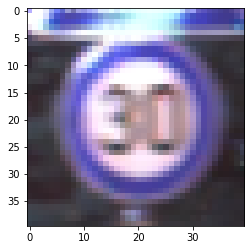

[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [ ]:
plt.imshow(train_X[0])
plt.show()
print(train_y[0])

plt.imshow(train_X[1])
plt.show()
print(train_y[1])

plt.imshow(train_X[400])
plt.show()
print(train_y[400])


In [ ]:
test_X = []
test_y = []

counts_test = [0 for _ in range(43)]

test_directory = "dataset/Test"
df = pd.read_csv("dataset/Test.csv")
dct = dict(zip(df.Path, df.ClassId))

for filename in os.listdir(test_directory):
    if filename.endswith(".png"):
        classId = dct[f'Test/{filename}']
        if classId not in labels:
            continue

        counts_test[classId] += 1
        img = cv.imread(test_directory + "/" + filename)
        img = cv.resize(img, (40,40))
        label = [0 for i in range(0, 43)]
        label[classId]  = 1
        test_X.append(img)
        test_y.append(label)

test_X = np.asarray(test_X, dtype = "float32")
test_y = np.asarray(test_y, dtype= "float32")

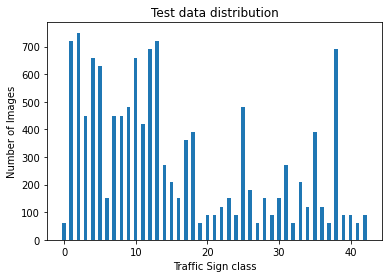

In [ ]:
plt.bar(range(43),counts_test,width=0.5)
plt.title('Test data distribution')
plt.ylabel('Number of Images')
plt.xlabel('Traffic Sign class')
plt.show()

In [ ]:
test_X, validation_X, test_y, validation_y = train_test_split(test_X, test_y, test_size=0.5)

In [ ]:
print(train_X.shape)
print(train_y.shape)
print(validation_X.shape)
print(validation_y.shape)
print(test_X.shape)
print(test_y.shape)

(39209, 40, 40, 3)
(39209, 43)
(6315, 40, 40, 3)
(6315, 43)
(6315, 40, 40, 3)
(6315, 43)


In [ ]:
model = Sequential()
model.add(Conv2D(filters=16, kernel_size=9, padding='same', activation='relu',
                 input_shape=train_X.shape[1:]))
model.add(MaxPooling2D(pool_size=2, strides=2))
model.add(Dropout(0.25))
model.add(Conv2D(filters=32, kernel_size=7, padding='same', activation='relu',
                 input_shape=train_X.shape[1:]))
model.add(MaxPooling2D(pool_size=2, strides=2))
model.add(Dropout(0.25))
model.add(Conv2D(filters=64, kernel_size=5, padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=2, strides=2))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(43, activation='softmax'))

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              metrics=['accuracy'])
history = model.fit(train_X, train_y,
              batch_size=16,
              epochs=20,
              validation_data=(validation_X, validation_y),
              shuffle=True)

Epoch 1/20
2451/2451 [==============================] - 36s 11ms/step - loss: 2.4070 - accuracy: 0.3402 - val_loss: 1.2732 - val_accuracy: 0.6257
Epoch 2/20
2451/2451 [==============================] - 25s 10ms/step - loss: 0.9224 - accuracy: 0.7161 - val_loss: 0.7309 - val_accuracy: 0.7883
Epoch 3/20
2451/2451 [==============================] - 26s 11ms/step - loss: 0.5291 - accuracy: 0.8335 - val_loss: 0.5456 - val_accuracy: 0.8586
Epoch 4/20
2451/2451 [==============================] - 26s 11ms/step - loss: 0.3444 - accuracy: 0.8911 - val_loss: 0.4227 - val_accuracy: 0.8852
Epoch 5/20
2451/2451 [==============================] - 25s 10ms/step - loss: 0.2406 - accuracy: 0.9239 - val_loss: 0.3895 - val_accuracy: 0.8993
Epoch 6/20
2451/2451 [==============================] - 26s 11ms/step - loss: 0.1859 - accuracy: 0.9430 - val_loss: 0.3495 - val_accuracy: 0.9110
Epoch 7/20
2451/2451 [==============================] - 27s 11ms/step - loss: 0.1367 - accuracy: 0.9568 - val_loss: 0.3571 -

In [ ]:
predictions = model.predict(test_X)[:10]
print(np.argmax(test_y[0]))
print(np.argmax(predictions[0]))

print(np.argmax(test_y[1]))
print(np.argmax(predictions[1]))

print(np.argmax(test_y[2]))
print(np.argmax(predictions[2]))

26
26
31
31
7
1


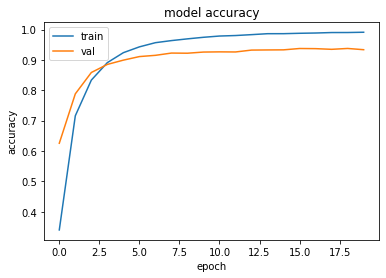

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

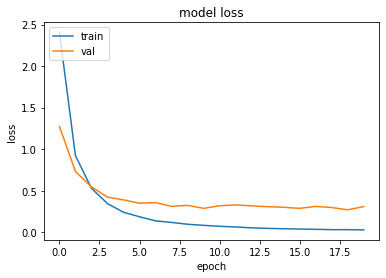

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
model.evaluate(test_X, test_y)

198/198 [==============================] - 1s 6ms/step - loss: 0.2914 - accuracy: 0.9360


[0.29141727089881897, 0.9360253214836121]